Accuracy: 0.75

Confusion Matrix:
 [[77 22]
 [16 39]]

Classification Report:
               precision    recall  f1-score   support

           0       0.83      0.78      0.80        99
           1       0.64      0.71      0.67        55

    accuracy                           0.75       154
   macro avg       0.73      0.74      0.74       154
weighted avg       0.76      0.75      0.76       154



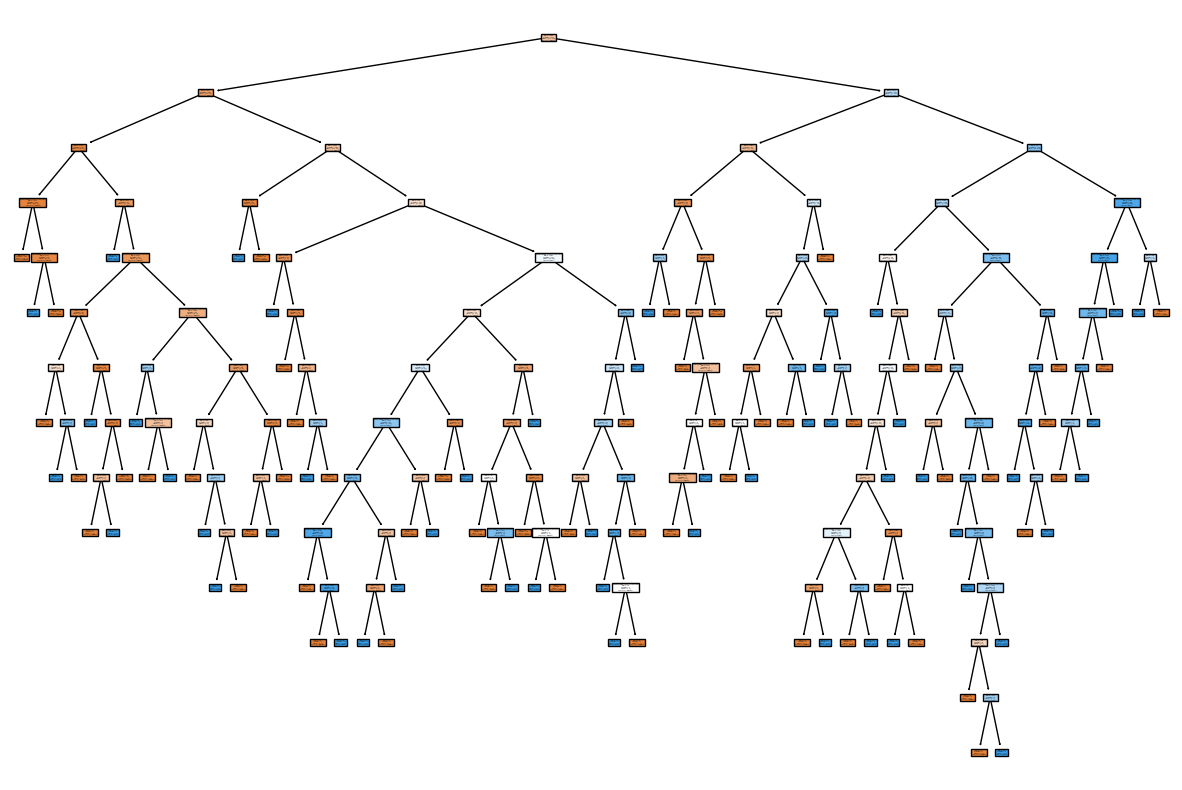

In [2]:
# Import necessary libraries
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn import tree
import matplotlib.pyplot as plt

# Load the dataset
data = pd.read_csv('diabetes.csv')

# Separate features (X) and target variable (y)
X = data.drop('Outcome', axis=1)
y = data['Outcome']

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize the decision tree classifier
clf = DecisionTreeClassifier()

# Train the model on the training set
clf.fit(X_train, y_train)

# Make predictions on the test set
y_pred = clf.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)
class_report = classification_report(y_test, y_pred)

# Display the results
print(f"Accuracy: {accuracy:.2f}")
print("\nConfusion Matrix:\n", conf_matrix)
print("\nClassification Report:\n", class_report)

# Visualize the decision tree
plt.figure(figsize=(15, 10))
tree.plot_tree(clf, feature_names=X.columns, class_names=['Non-Diabetic', 'Diabetic'], filled=True)
plt.show()


Dataset information:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB
None

Descriptive Statistics:
       Pregnancies     Glucose  BloodPressure  SkinThickness     Insulin  \
count   768.000000  768.000000     768.000000     768.000000  768.000000   
mean      3.845052  120.894531      6

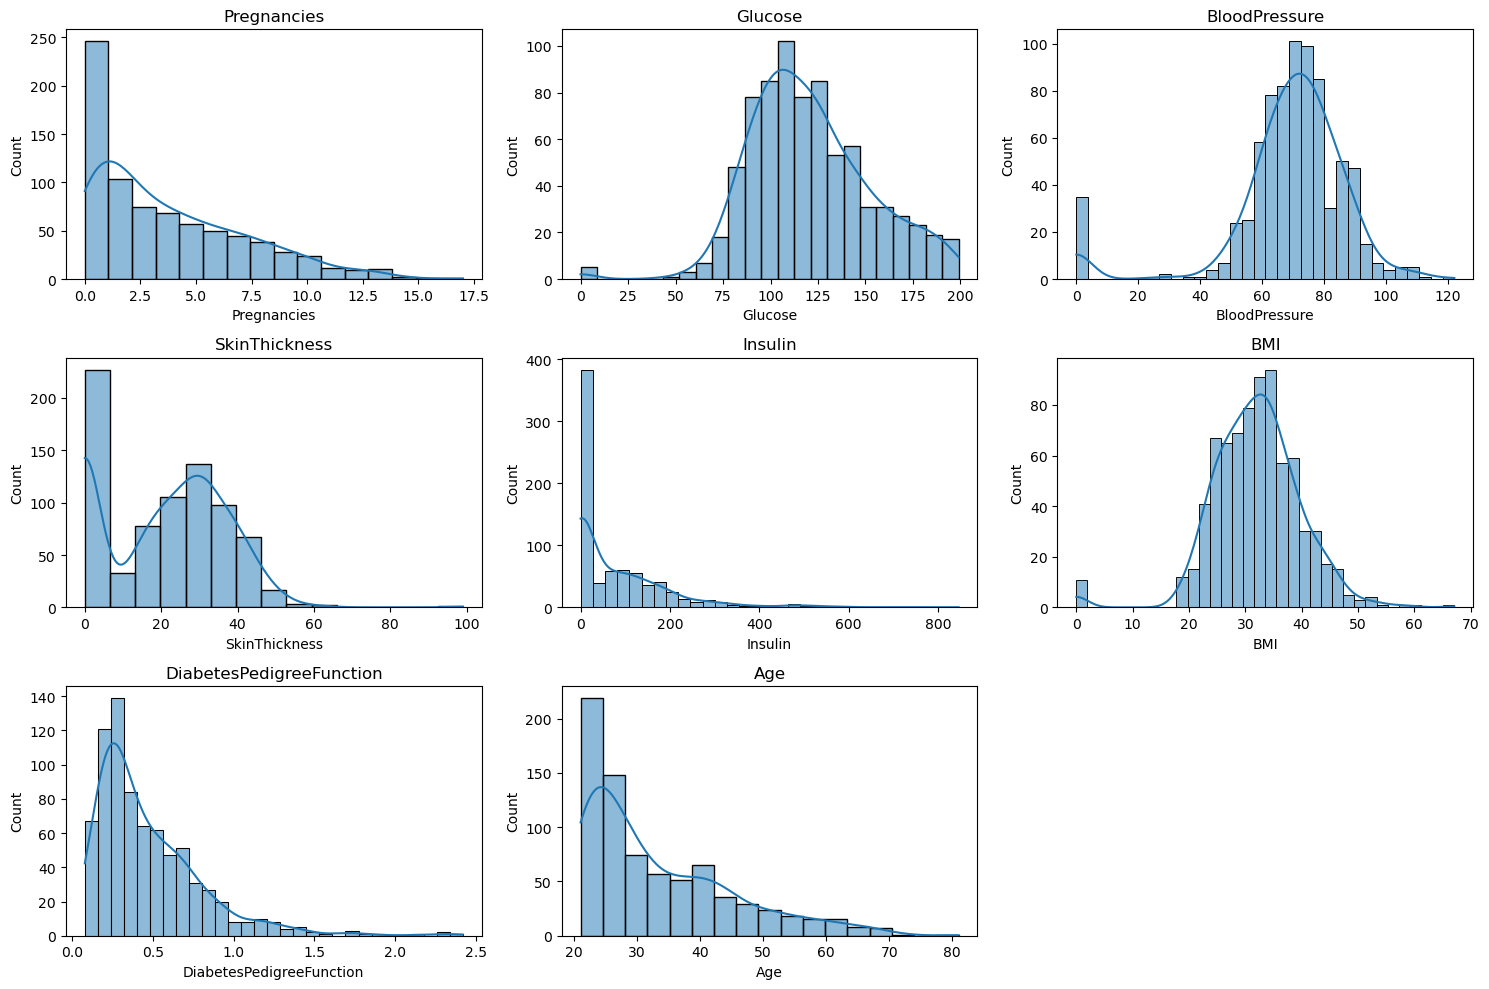

In [6]:
# ans2:

# Import necessary libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load the dataset
data = pd.read_csv('diabetes.csv')

# Display basic information about the dataset
print("Dataset information:")
print(data.info())

# Display descriptive statistics
print("\nDescriptive Statistics:")
print(data.describe())

# Visualize the distribution of each variable
plt.figure(figsize=(15, 10))
for i, column in enumerate(data.columns[:-1]):
    plt.subplot(3, 3, i + 1)
    sns.histplot(data[column], kde=True)
    plt.title(column)
plt.tight_layout()
plt.show()



Missing Values:
Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

Dataset information after preprocessing:
<class 'pandas.core.frame.DataFrame'>
Int64Index: 759 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               759 non-null    int64  
 1   Glucose                   759 non-null    float64
 2   BloodPressure             759 non-null    float64
 3   SkinThickness             759 non-null    float64
 4   Insulin                   759 non-null    float64
 5   BMI                       759 non-null    float64
 6   DiabetesPedigreeFunction  759 non-null    float64
 7   Age                       759 non-null    int64  
 8   

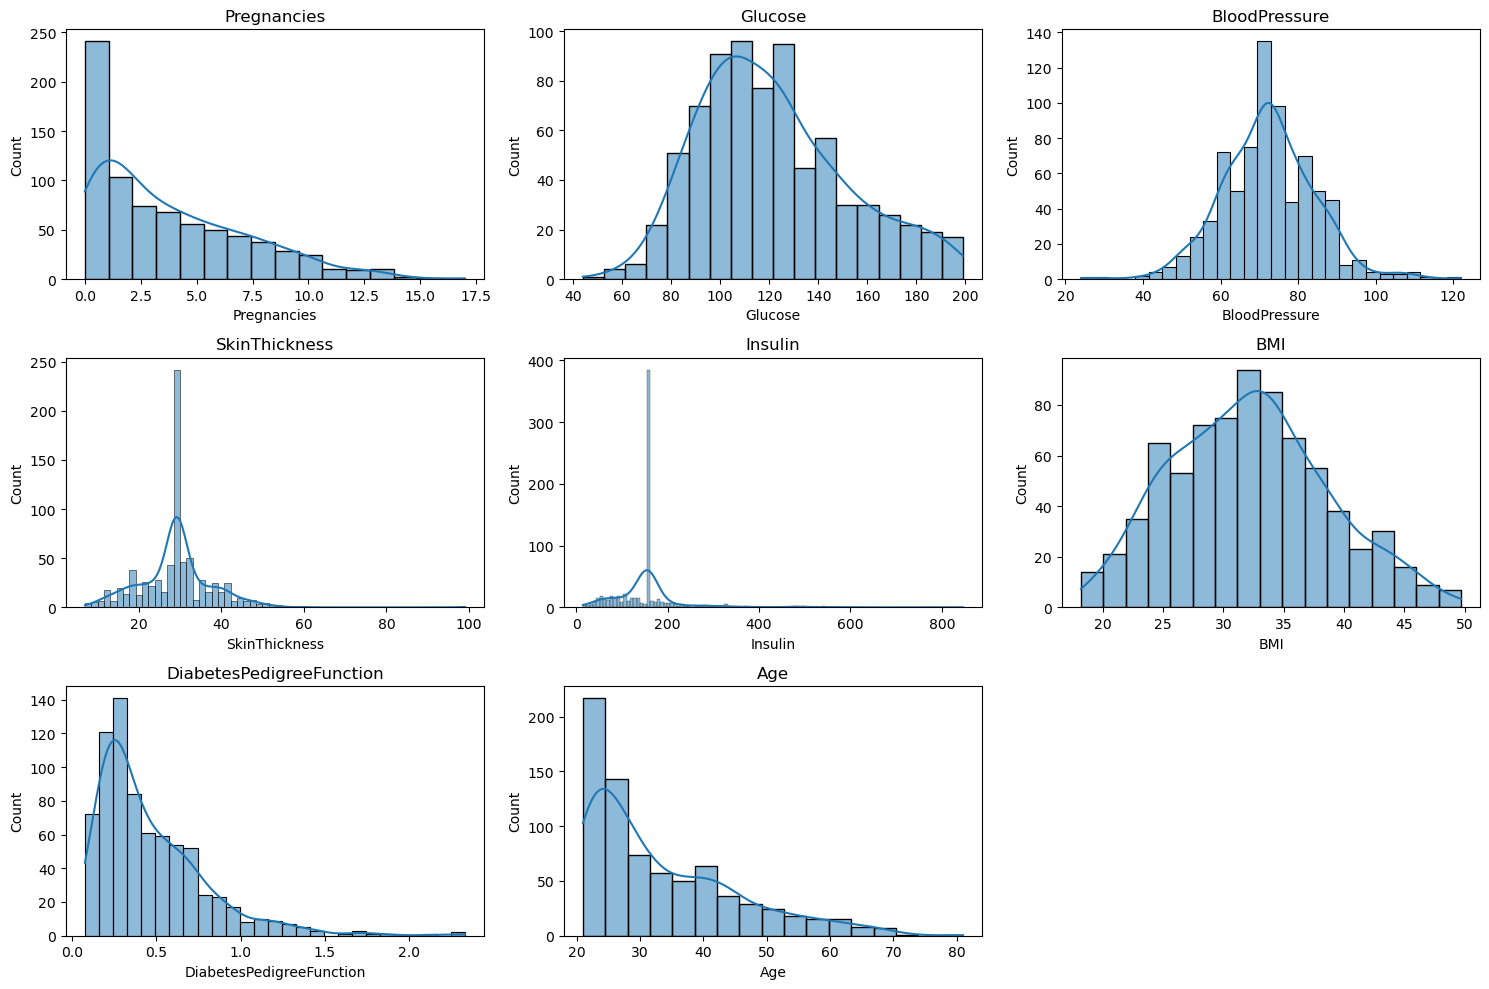

In [4]:
# ans 3 :

# Import necessary libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler

# Load the dataset
data = pd.read_csv('diabetes.csv')

# Display basic information about missing values
print("Missing Values:")
print(data.isnull().sum())

# Handling missing values
imputer = SimpleImputer(missing_values=0, strategy='mean')
data[['Glucose', 'BloodPressure', 'SkinThickness', 'Insulin', 'BMI']] = imputer.fit_transform(
    data[['Glucose', 'BloodPressure', 'SkinThickness', 'Insulin', 'BMI']]
)

# Remove outliers (considering a simple approach)
data = data[(data['BMI'] < 50) & (data['BloodPressure'] < 150) & (data['Glucose'] < 250)]

# Separate features (X) and target variable (y)
X = data.drop('Outcome', axis=1)
y = data['Outcome']

# Standardize the features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Display basic information after preprocessing
print("\nDataset information after preprocessing:")
print(data.info())

# Visualize the distribution of each variable after preprocessing
plt.figure(figsize=(15, 10))
for i, column in enumerate(data.columns[:-1]):
    plt.subplot(3, 3, i + 1)
    sns.histplot(data[column], kde=True)
    plt.title(column)
plt.tight_layout()
plt.show()


In [5]:
# ans 4:

# Import necessary libraries
from sklearn.model_selection import train_test_split

# Set a random seed for reproducibility
random_seed = 42

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=random_seed)

# Display the shapes of the training and testing sets
print("Shape of X_train:", X_train.shape)
print("Shape of X_test:", X_test.shape)
print("Shape of y_train:", y_train.shape)
print("Shape of y_test:", y_test.shape)


Shape of X_train: (607, 8)
Shape of X_test: (152, 8)
Shape of y_train: (607,)
Shape of y_test: (152,)


In [7]:
# asn 5:

# Import necessary libraries
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import GridSearchCV

# Create a decision tree classifier
dt_classifier = DecisionTreeClassifier(random_state=random_seed)

# Define hyperparameters to tune
param_grid = {
    'criterion': ['gini', 'entropy'],
    'max_depth': [None, 10, 20, 30, 40, 50],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

# Use GridSearchCV for hyperparameter tuning and cross-validation
grid_search = GridSearchCV(estimator=dt_classifier, param_grid=param_grid, cv=5, scoring='accuracy')
grid_search.fit(X_train, y_train)

# Display the best hyperparameters
best_params = grid_search.best_params_
print("Best Hyperparameters:", best_params)

# Train a decision tree model with the best hyperparameters on the entire training set
best_dt_classifier = DecisionTreeClassifier(random_state=random_seed, **best_params)
best_dt_classifier.fit(X_train, y_train)

# Evaluate the model on the test set
y_pred = best_dt_classifier.predict(X_test)

# Display the accuracy on the test set
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy on Test Set:", accuracy)


Best Hyperparameters: {'criterion': 'entropy', 'max_depth': None, 'min_samples_leaf': 4, 'min_samples_split': 10}
Accuracy on Test Set: 0.7171052631578947


Accuracy: 0.7171052631578947
Precision: 0.5813953488372093
Recall: 0.5
F1 Score: 0.5376344086021505

Confusion Matrix:
 [[84 18]
 [25 25]]


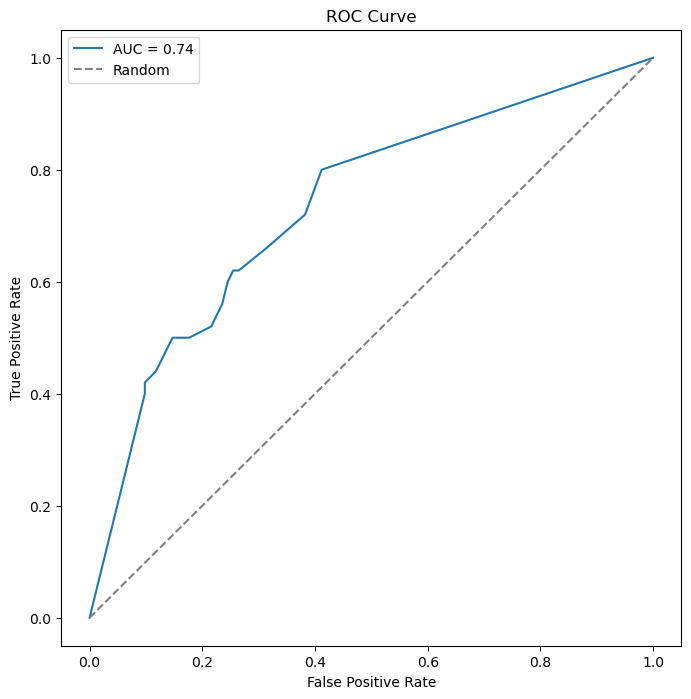

In [8]:
# asn 6:

# Import necessary libraries
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, roc_curve, roc_auc_score
import matplotlib.pyplot as plt

# Evaluate the model on the test set
y_pred = best_dt_classifier.predict(X_test)

# Calculate evaluation metrics
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

# Display the evaluation metrics
print("Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)
print("F1 Score:", f1)

# Confusion Matrix
conf_matrix = confusion_matrix(y_test, y_pred)
print("\nConfusion Matrix:\n", conf_matrix)

# ROC Curve and AUC
y_prob = best_dt_classifier.predict_proba(X_test)[:, 1]
fpr, tpr, thresholds = roc_curve(y_test, y_prob)
roc_auc = roc_auc_score(y_test, y_prob)

# Plot ROC Curve
plt.figure(figsize=(8, 8))
plt.plot(fpr, tpr, label=f'AUC = {roc_auc:.2f}')
plt.plot([0, 1], [0, 1], linestyle='--', color='gray', label='Random')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend()
plt.show()


# ans 7:

To interpret the decision tree, we can examine the splits, branches, and leaves. Unfortunately, I won't have the specific tree structure without the exact data and training process, but I can provide a general approach on how to interpret a decision tree.

Here's how you can interpret a decision tree:

1. **Root Node and Splits:**
   - The root node represents the entire dataset.
   - Each split represents a decision based on a feature and its threshold. For example, a split on "Glucose" with a threshold of 140 means that the decision tree is dividing the dataset into two groups: one with glucose levels below 140 and another with glucose levels equal to or above 140.

2. **Branches:**
   - Follow the branches from the root node to the leaves based on the decisions made at each split.
   - Each branch represents a path through the decision tree based on the feature values of a particular instance.

3. **Leaves:**
   - The leaves represent the final predicted outcome (0 for non-diabetic, 1 for diabetic).
   - The majority class in a leaf determines the predicted class for instances that reach that leaf.

4. **Variable Importance:**
   - Decision trees provide a measure of feature importance. Features used near the top of the tree are often more important in making predictions.
   - You can access feature importances using `best_dt_classifier.feature_importances_` after fitting the model.

Here's an example of how you might interpret the tree structure (assuming the variable names remain the same):

```python
# Assuming best_dt_classifier is the trained DecisionTreeClassifier
feature_importance = best_dt_classifier.feature_importances_
feature_names = X.columns

# Display feature importance
for feature, importance in zip(feature_names, feature_importance):
    print(f"{feature}: {importance:.4f}")
```

This will provide a list of features and their importance scores.

Domain knowledge is crucial for interpretation. For instance, if "Glucose" is a top split, it suggests that glucose levels play a significant role in predicting diabetes. Similarly, if "BMI" is a critical split, it implies that body mass index is an essential factor.

Always validate your interpretation with domain experts and be cautious not to overinterpret small splits in the tree, as they might be capturing noise in the training data. Additionally, decision trees can be prone to overfitting, so consider tuning hyperparameters or using ensemble methods for better generalization.

# ans 8:

Validating the decision tree model is crucial to ensure its robustness and generalization to new data or changes in the dataset or environment. Here are some approaches to validate the decision tree model and explore uncertainty and risks:

1. **Cross-Validation:**
   - Use techniques like k-fold cross-validation to assess the model's performance on multiple subsets of the data. This helps ensure that the model's performance is consistent across different data partitions.

```python
from sklearn.model_selection import cross_val_score

# Perform cross-validation
cv_scores = cross_val_score(best_dt_classifier, X_scaled, y, cv=5, scoring='accuracy')
print("Cross-Validation Scores:", cv_scores)
print("Mean Accuracy:", cv_scores.mean())
```

2. **Bootstrap Sampling:**
   - Apply bootstrap sampling to generate multiple resamples of the dataset. Train the decision tree on each resample and evaluate its performance. This helps estimate the variability in model performance.

3. **Sensitivity Analysis:**
   - Conduct sensitivity analysis by varying input features within plausible ranges. Observe how changes in feature values affect the model's predictions. This provides insights into the stability of the model under different conditions.

```python
# Example sensitivity analysis for a single feature (e.g., Glucose)
sensitivity_feature = 'Glucose'
original_values = X_test[sensitivity_feature].copy()

for perturbation in [0.5, 1.0, 1.5]:
    X_test[sensitivity_feature] = original_values * perturbation
    y_pred_perturbed = best_dt_classifier.predict(X_test)
    accuracy_perturbed = accuracy_score(y_test, y_pred_perturbed)
    print(f"Perturbation: {perturbation}, Accuracy: {accuracy_perturbed:.4f}")

# Reset to original values
X_test[sensitivity_feature] = original_values
```

4. **Scenario Testing:**
   - Create specific scenarios that represent potential changes in the dataset or environment. Test the model's performance in these scenarios to assess its robustness to different conditions.

5. **Temporal Validation:**
   - If the dataset has a temporal component, split the data into training and testing sets based on time. Train the model on historical data and validate it on more recent data. This helps assess the model's ability to generalize to future instances.

6. **Random Noise Testing:**
   - Introduce random noise to the dataset and evaluate how the model responds. This can help assess the model's sensitivity to noise and identify potential areas for improvement.

```python
import numpy as np

# Example random noise testing
X_test_noisy = X_test + np.random.normal(0, 0.1, size=X_test.shape)
y_pred_noisy = best_dt_classifier.predict(X_test_noisy)
accuracy_noisy = accuracy_score(y_test, y_pred_noisy)
print("Accuracy on Noisy Data:", accuracy_noisy)
```

7. **Monitoring Metrics Over Time:**
   - If the model is deployed in a real-world setting, continuously monitor its performance metrics over time. This helps identify performance degradation or changes in the data distribution.

Remember that the specific approach to validation depends on the nature of the data and the application. Regular validation and monitoring are essential to ensure the ongoing reliability of the decision tree model.

In [ ]:
# ans 9:

